# Clase 4: k Nearest Neighbors

El objetivo de este ejercicio es aplicar el clasificador kNN en situaciones reales con conjuntos de múltiples clases y múltiples características.

**Ejemplo 1: Clasificación multiclase con dos características.**

Adaptado del ejemplo de kNN de Juan Ignacio Bagnato [Clasificar con K-Nearest-Neighbor ejemplo en Python](https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Descarga y exploración de los datos

In [2]:
!wget http://www.aprendemachinelearning.com/wp-content/uploads/2018/07/reviews_sentiment.csv

--2020-10-15 03:44:45--  http://www.aprendemachinelearning.com/wp-content/uploads/2018/07/reviews_sentiment.csv
Resolving www.aprendemachinelearning.com (www.aprendemachinelearning.com)... 172.67.153.167, 104.27.134.216, 104.27.135.216
Connecting to www.aprendemachinelearning.com (www.aprendemachinelearning.com)|172.67.153.167|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.aprendemachinelearning.com/wp-content/uploads/2018/07/reviews_sentiment.csv [following]
--2020-10-15 03:44:45--  https://www.aprendemachinelearning.com/wp-content/uploads/2018/07/reviews_sentiment.csv
Connecting to www.aprendemachinelearning.com (www.aprendemachinelearning.com)|172.67.153.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22933 (22K) [text/csv]
Saving to: ‘reviews_sentiment.csv’

reviews_sentiment.c 100%[===================>]  22.40K  --.-KB/s    in 0.004s  

2020-10-15 03:44:46 (5.60 MB/s) - ‘reviews_sentiment.csv’ saved [22933/22

In [3]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [4]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Revisión de las características a utilizar

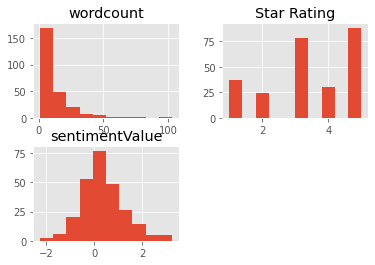

In [5]:
dataframe.hist()
plt.show()

In [6]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


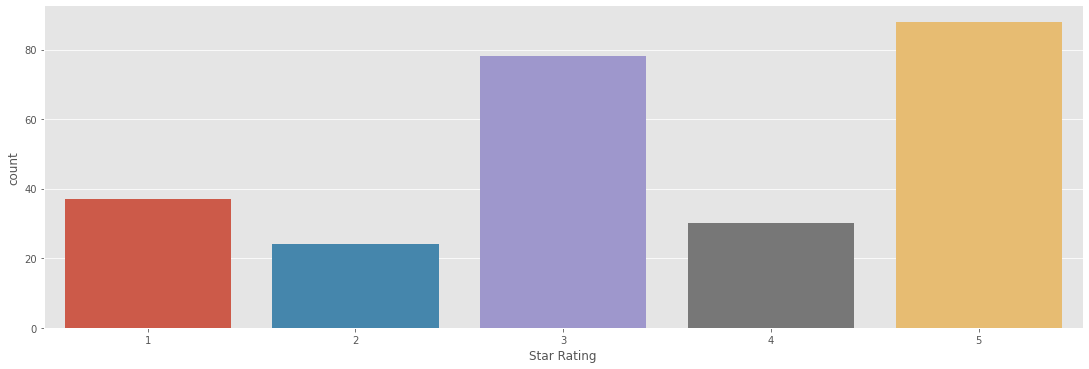

In [7]:
sns.catplot('Star Rating',data=dataframe,kind="count", aspect=3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


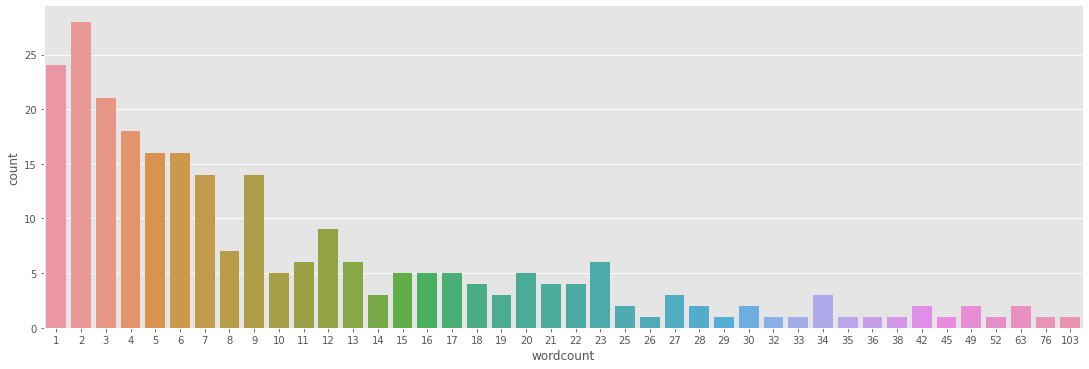

In [8]:
sns.catplot('wordcount',data=dataframe,kind="count", aspect=3)

Separación de datos en conjuntos de entrenamiento y validación. Se escala los conjuntos de entrenamiento.

In [9]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenamiento con los parámetros por defecto y k = 7

Recordar que 'distance=minkowski' y 'p=2' es la distancia euclideana. Esta puede cambiar a distancia euclideana directo o distancia manhattan, cambiando el 'distance' o el 'p'. Recordar que minkowski es la generalización de la distancia euclideana y manhattan.

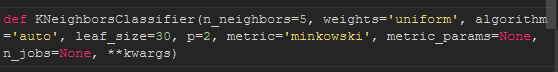

In [10]:
n_neighbors = 7

#este es el KNN classifier | Basta con el número de vecinos para poder clasificar 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


Matriz de confusión y métricas adicionales.

In [11]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
        
    Reference
    -------
    https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
    
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(fig)

**Precisión para una clase C**: Número de predicciones de clase C correctas/Número de predicciones de clase C.

**Recall para una clase C:** Número de predicicciones de clase C correctas/Número de elementos de clase C.

Podemos utilizar una **matriz de confusión** para graficar las predicciones respecto a las clases reales.

In [12]:
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Figure(720x504)


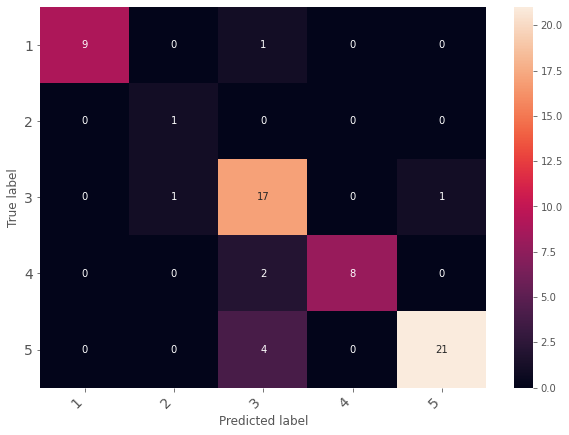

In [13]:
print_confusion_matrix(confusion_matrix(y_test, pred),["1","2","3","4","5"])

Gráfica de la distribución de muestras y clases en el espacio de características.

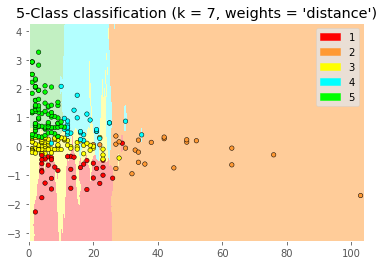

In [14]:
h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
 
plt.show()

Grid search para encontrar el mejor k.

([<matplotlib.axis.XTick at 0x7fa88e9ed588>,
 <a list of 5 Text major ticklabel objects>)

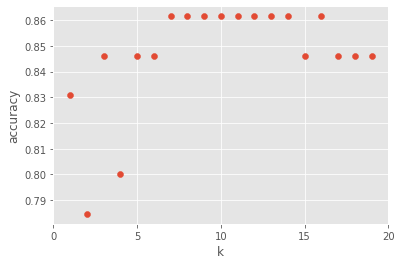

In [15]:
#NOTE CÓMO ENCUENTRA EL MEJOR K EN BASE AL ACCURACY

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Predicción para nuevos valores

In [16]:
print(clf.predict([[5, 1.0]]))
print(clf.predict_proba([[5, 1.0]]))

[5]
[[0.        0.        0.0795438 0.        0.9204562]]


**Ejemplo 2: Clasficiación en dos clases con multiples dimensiones.**

Experimentación con el dataset [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/) de Kaggle. 

Descarga y exploración de los datos

In [17]:
!wget 'https://drive.google.com/uc?export=download&id=1nHtpFU3BDjAf1KB88fPHlD9iTLC8b4US' -O diabetes.csv

--2020-10-15 03:45:07--  https://drive.google.com/uc?export=download&id=1nHtpFU3BDjAf1KB88fPHlD9iTLC8b4US
Resolving drive.google.com (drive.google.com)... 74.125.204.101, 74.125.204.138, 74.125.204.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d6mvemmdq4a654js2dha5ulsgq5qk6as/1602733500000/13307417494834192396/*/1nHtpFU3BDjAf1KB88fPHlD9iTLC8b4US?e=download [following]
--2020-10-15 03:45:07--  https://doc-0k-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d6mvemmdq4a654js2dha5ulsgq5qk6as/1602733500000/13307417494834192396/*/1nHtpFU3BDjAf1KB88fPHlD9iTLC8b4US?e=download
Resolving doc-0k-3c-docs.googleusercontent.com (doc-0k-3c-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0k-3c-docs.googleusercontent.com (doc-0k

In [18]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Limpieza de datos faltantes

In [21]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [22]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

Distribución de características y resultado.

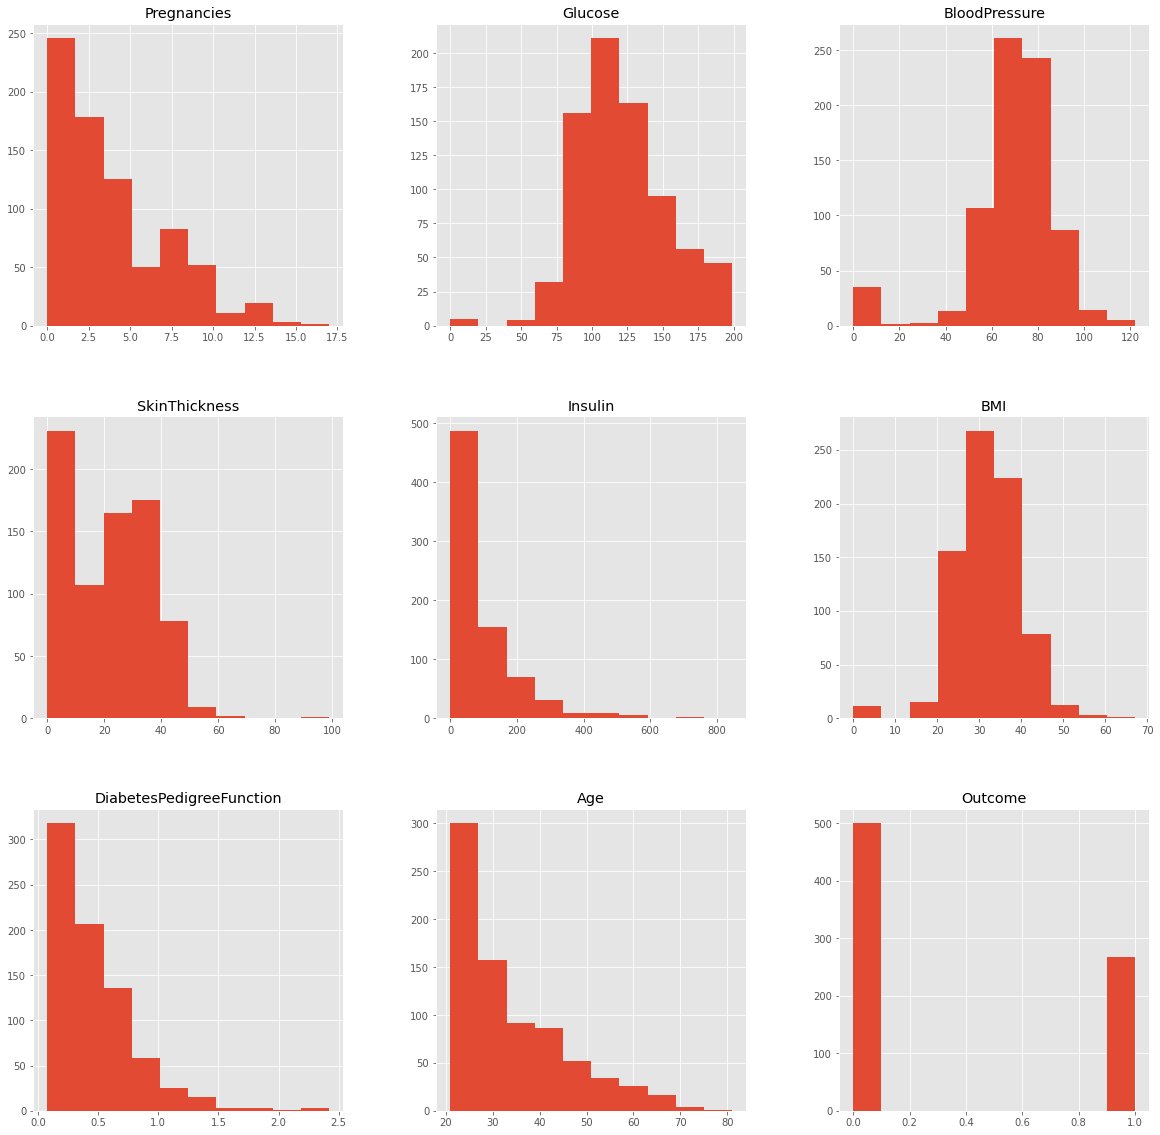

In [23]:
p = diabetes_data.hist(figsize = (20,20))

Escalamiento de datos

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [25]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-3.301757e-16,1.000652,-2.554131,-0.721221,-0.154088,0.610309,2.541850
BloodPressure,768.0,6.966722e-16,1.000652,-4.004245,-0.695306,-0.016759,0.628269,4.102655
SkinThickness,768.0,-1.795800e-16,1.000652,-2.516429,-0.467597,-0.012301,0.329171,7.955377
Insulin,768.0,4.416317e-17,1.000652,-1.467353,-0.222085,-0.181541,-0.155477,8.170442
BMI,768.0,2.815312e-16,1.000652,-2.074783,-0.721209,-0.022590,0.603256,5.042397
DiabetesPedigreeFunction,768.0,2.398978e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


In [26]:
y = diabetes_data_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Separación en conjunto de entrenamiento y validación.

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

#random_state: semilla de aleatoriedad!!!!!!!!
#aleatoriedad generada por una computadora: seudo aleatoriedad
#esa semilla permite setearse en base al tiempo (milisegundos) que toma para poder generar
#esos valores random
#el random_state = 42 permitirá guardar el registro 42 generado para la aleatoriedad 
#segun el timestamp al que pertenece

#Entonces, si cambio el 'random_state', cambiará el conjunto de datos seleccionados en el split

Stratyify: un parámetro que indica separación de los datos según otro conjunto, en este caso 'Y'. Esto es importante para preservar el valor de separación en los clusters para K. Como estamos usando KNN para clasificación, debe preservar los valores de estratificación en cada grupo similares a la cantidad de valores de Y (que es lo que se quiere clasificar).

Se realiza el entrenamiento con distintos valors para buscar el mejor valor de k.

In [28]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


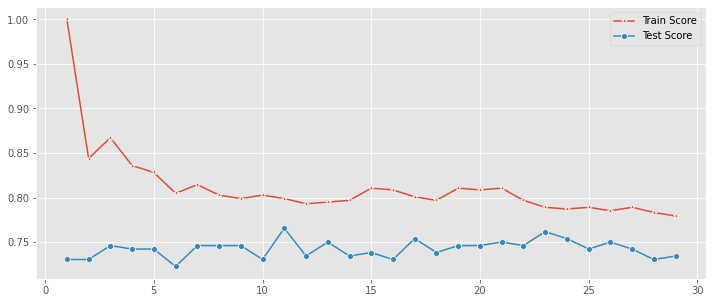

In [29]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

El valor de k con el mejor score en el conjunto de validación es 11. Se usará este valor para obtener un score en el conjunto de validación.

In [30]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)

print ('Exactitud en el conjunto de entrenamiento: %0.4f' % knn.score(X_train,y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % knn.score(X_test,y_test))

Exactitud en el conjunto de entrenamiento: 0.7988
Exactitud en el conjunto de validación: 0.7656


Figure(720x504)


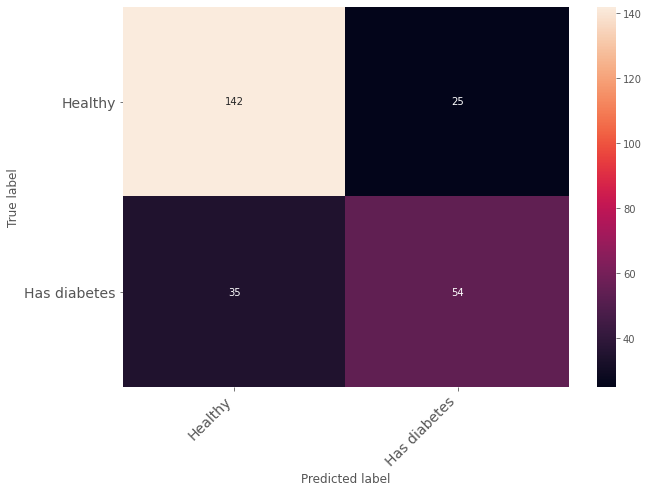

In [31]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
print_confusion_matrix(confusion_matrix(y_test,y_pred),["Healthy","Has diabetes"])


Reporte de clasificación para los datos (0 = Healthy, 1 = Has diabetes)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## TAREA

Existe un menor valor de k que permite obtener la misma exactitud máxima para X_test, y_test (considerando la separación train/test actual con random_state=42). Experimente con los distintos parámetros del modelo para encontrar el mejor valor de k. Puede revisar la documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Sugerencias:

1. Puede realizar un gridsearch para probar distintas combinaciones de distancas moviendo el parámetro p (de la métrica de distancia por defecto *minkowski*) en un rango.

2. Mantener el algoritmo en *auto*, el algoritmo influye en que tan óptima es la ejecución de la predicción más no en los resultados del modelo. Este solo optimiza el tiempo de búsqueda.

3. Piense que otro parámetro puede influir en la exactitud del modelo.


In [33]:
import itertools

In [76]:
#definimos los valores sobre los cuales ejecutar la búsqueda

#distancia manhattan: 1, distancia euclideana: 2
possibleP = [1,2]

#uniform: todos los puntos en cada neigborhood son ponderados igualmente
#distance: los puntos son ponderados de acuerdo a la distancia de c/u con los neighrbhood
possibleW = ['uniform', 'distance']

#valores de K: deben ser menores de 11
possibleK = range(1,11)

#desarrollamos una lista combinatoria
combinatorial_ = list(itertools.product(*[possibleK, possibleW, possibleP]))

In [89]:
info_ = []

#iteración de búsqueda (no se usa la función grid por comodidad)
for combination in combinatorial_:
    #modelo con los insumos de búsqueda
    knn = KNeighborsClassifier(
        n_neighbors=combination[0], 
        weights=combination[1], 
        p=combination[2]
        )
    
    #fit del modelo: conjunto de entrenamiento
    knn.fit(X_train,y_train)

    #recolección de resultados
    info_.append(
        {
            'K': combination[0],
            'weight': combination[1],
            'p':  combination[2],
            'train_score': knn.score(X_train,y_train),
            'test_score': knn.score(X_test,y_test)
        }
    )

In [90]:
#tabulación de datos
result = pd.DataFrame(info_)

In [91]:
#visualización de datos tabulares
#puede notarse overfitting en partes del conjunto de entrenamiento 
result.head()

,K,weight,p,train_score,test_score
0,1,uniform,1,1.000000,0.714844
1,1,uniform,2,1.000000,0.730469
2,1,distance,1,1.000000,0.714844
3,1,distance,2,1.000000,0.730469
4,2,uniform,1,0.851562,0.738281


In [92]:
#eliminamos los train score iguales a 1 (muestras overfiteadas)
result = result.query("train_score!=1.0")

In [93]:
#nótese cómo el tipo de peso 'distance' termina overfiteando al conjunto de entrenamiento
#al hacer la depuración, este se elimina por completo
#Recordar: weight = 'distance' (pondera a los vecinos más cercanos con mayor peso)
#queda solo weight = 'uniform'
result

,K,weight,p,train_score,test_score
4,2,uniform,1,0.851562,0.738281
5,2,uniform,2,0.843750,0.730469
8,3,uniform,1,0.873047,0.757812
9,3,uniform,2,0.867188,0.746094
12,4,uniform,1,0.820312,0.750000
13,4,uniform,2,0.835938,0.742188
16,5,uniform,1,0.820312,0.761719
17,5,uniform,2,0.828125,0.742188
20,6,uniform,1,0.810547,0.753906
21,6,uniform,2,0.804688,0.722656


In [94]:
#decidimos la mejor combinatoria:
result.loc[result.test_score.idxmax()]

K                     5
weight          uniform
p                     1
train_score    0.820312
test_score     0.761719
Name: 16, dtype: object

El menor valor de K que cumple con otorgar un score óptimo en el conjunto de entrenamiento, a partir de la nueva búsqueda realizada, es:

## *5*

Nótese que también 9 con un valor de p = 1 otorga el mismo score para el OOF (0.761719). Sin embargo, debido a que otorga un menor score en el entrenamiento (0.798828 vs 0.82), fue elegido K = 5. 

Recordar que el valor K = 11 anterior tuvo un score OOF de _0.7656_, equivalente al obtenido.
